In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (12, 12)

In [24]:
from model.classifier import KNN
from util.datasets import train_test_split, artificial_one
from util.plotlib import *
from util.metrics import *
from sklearn.utils import shuffle

In [25]:
samples, targets = artificial_one(10)
samples = normalize(samples)

In [26]:
realizations = 20
ks_2b_tested = [1, 2, 3, 4, 5, 6]
save_state_hitrate_k = []
save_state_cfs_matrix_k = []
save_state_samples_k = []
save_state_targets_k = []
save_state_predicted_k = []

In [27]:
for r in range(realizations):
    save_temp_samples = []
    save_temp_targets = []
    save_temp_predicted = []
    save_temp_hitrate = []
    save_temp_cfs_matrix = []
    for i, k in enumerate(ks_2b_tested):
        _hitrate = 0
        _cfs_matrix = []

        samples, targets = shuffle(samples, targets)

        x_train, x_test, y_train, y_test = train_test_split(samples, targets, .75)
        clf = KNN(k=k, samples=x_train, targets=y_train)

        predicted = clf.predict(x_test)
        _hitrate = hitrate(y_test, predicted)
        _cfs_matrix = confusion_matrix(y_test, predicted, len(np.unique(targets)))

        # saving temporary data
        save_temp_samples.append(samples)
        save_temp_targets.append(targets)
        save_temp_predicted.append(predicted)
        save_temp_hitrate.append(_hitrate)
        save_temp_cfs_matrix.append(_cfs_matrix)


    # saving definitive data
    save_state_samples_k.append(save_temp_samples)
    save_state_targets_k.append(save_temp_targets)
    save_state_predicted_k.append(save_temp_predicted)
    save_state_hitrate_k.append(save_temp_hitrate)
    save_state_cfs_matrix_k.append(save_temp_cfs_matrix)

In [28]:
# visualizing hitrates
save_state_hitrate_k = np.asarray(save_state_hitrate_k)
save_state_hitrate_k

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [29]:
# better and worst hitrate indexes
argsminmax(save_state_hitrate_k, np.argmax)

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
argsminmax(save_state_hitrate_k, np.argmin)

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
# accuracy and std by k-value
acc = np.asarray(accuracy(save_state_hitrate_k)).reshape(len(ks_2b_tested), 1)
std = standard_deviation(save_state_hitrate_k)
argmax, argmin = argsminmax(acc, np.argmax), argsminmax(acc, np.argmin)

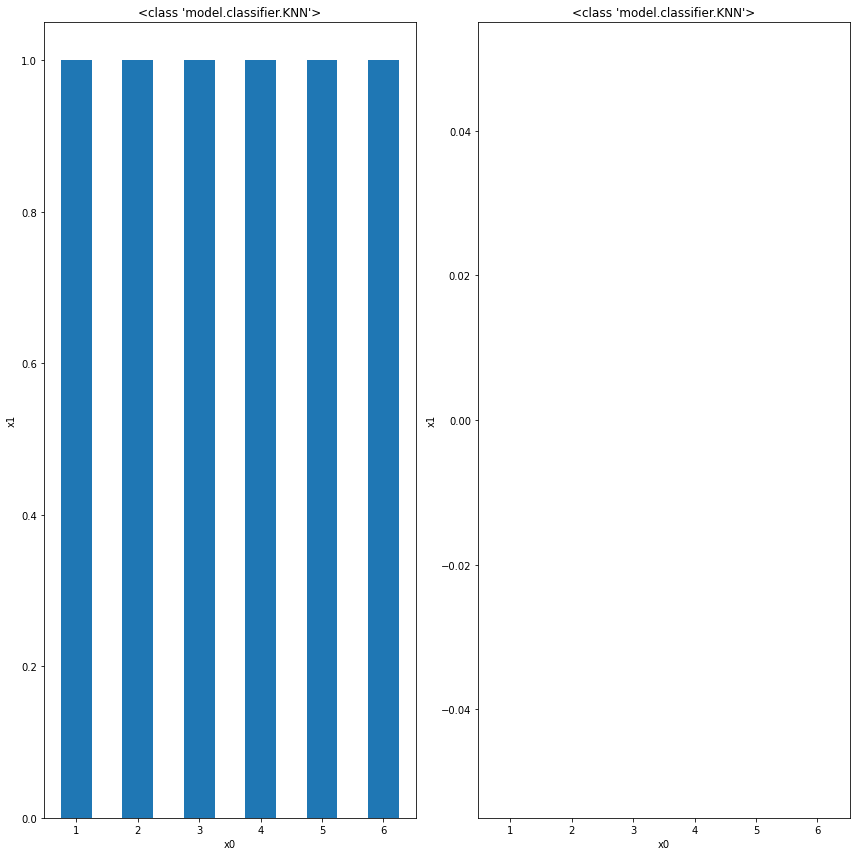

In [32]:
plot_bar(KNN, y=accuracy(save_state_hitrate_k), x=ks_2b_tested, pos=121)
plot_bar(KNN, y=std, x=ks_2b_tested, pos=122)

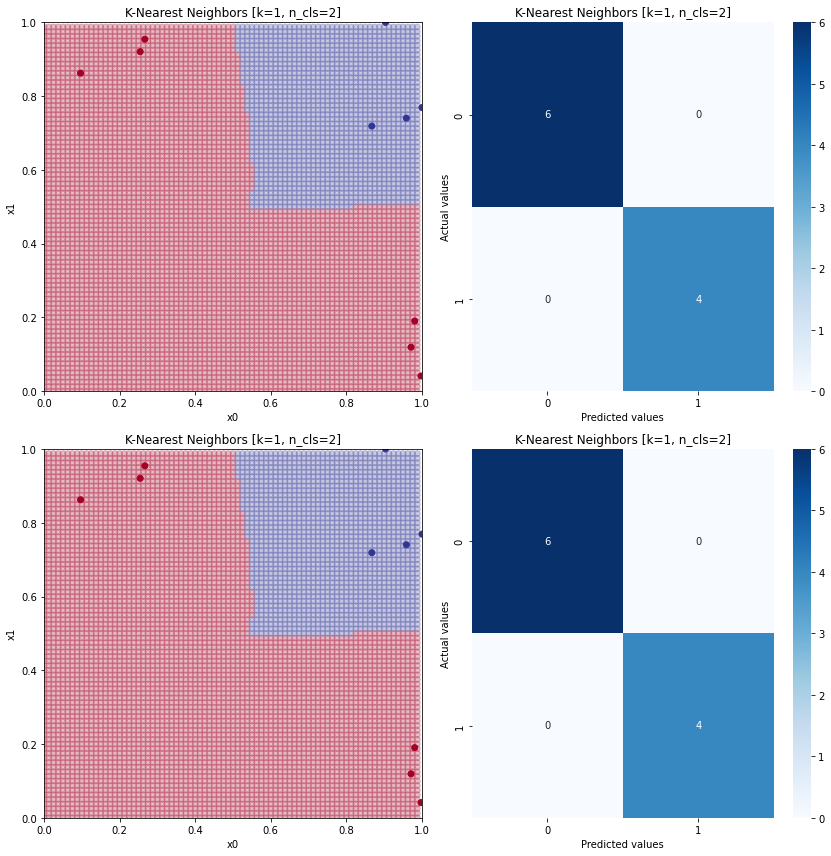

In [33]:
for i, pos in [(argmax, (221, 222)), (argmin, (223, 224))]:
    tsamples = save_state_samples_k[i][i]
    ttargets = save_state_targets_k[i][i]
    tk = ks_2b_tested[i]

    x_train, x_test, y_train, y_test = train_test_split(tsamples, ttargets, .75)
    clf = KNN(tk, x_train, y_train)
    plot_decision_boundary(clf, x_test, y_test, pos[0])
    plot_confusion_matrix(clf, x_test, y_test, pos[1])
plt.show()